# Big Data and Data Analytics - Lab Project 3
This lab project covers the material from Lectures 1-7. Please make yourself familiar with the lecture content before proceeding. We will be using the [**Boston**](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) housing dataset courtesy of D. Harrison and D. L. Rubinfeld at the University of Toronto.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in your own words, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

If there are any errors during the import above, you may need to install the allowed libraries.

## Exercise 1: Dataset Import and Preparation (0.5 marks)

### Exercise 1.1 (0.5 marks)
- Load the dataset `Housing.csv` into a pandas `DataFrame` named `df_housing`.
- Investigate whether there are rows affected by missing values in `df_housing` and `print` your results to the console. If any rows are affected by missing values, remove these from `df_housing`.

Hint: Look at the functions [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [308]:
df_housing= pd.read_csv("Housing.csv")
print(df_housing.isna().any)
df_housing = df_housing.dropna()

<bound method NDFrame._add_numeric_operations.<locals>.any of         ID   CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

       TAX  P

## Exercise 2: Regression (5 marks)

### Exercise 2.1 (2 marks)
- Perform a multiple linear regression that regresses `MEDV` on `CRIM` (per capita crime rate by town), `RM` (average number of rooms per dwelling), `NOX` (nitric oxides concentration; parts per 10 million), `DIS` (weighted distances to five Boston employment centres), and `AGE` (proportion of owner- occupied units built prior to 1940). Save the model as `res_1`.
- `print` the results of the regression `res_1` to the console (including a regression table and reporting of F-values).
- Interpret the results of the regression `res_1` in your own words according to APA style. This includes which parts of the model are significant and what impact they have on `MEDV`.

Hint: Use [`statsmodels.formula.api.ols`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols) to perform the regression. `statsmodels.formula.api` has been imported above as `smf`.

In [309]:
res_1 = smf.ols('MEDV ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) #OLS model
res_1 = res_1.fit()
print(res_1.summary())
print('AIC = ',res_1.aic)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.02e-95
Time:                        21:06:50   Log-Likelihood:                -1613.2
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2273      4.015     -1.551      0.1

In our OLS model we are testing for relationships between MEDV and 5 other predictor variables. We observe a significant negative relationship across the predictor variables excluding RM, which holds a significant positive relationship. For every '1' value increase in CRIM, NOX, DIS and AGE, we see a decrease in value for MEDV, validated by a p-value of less than 0.000 across all predictors. RM exhibits a positive coefficient relationship where for every '1' value increase, we see a 7.7 unit increase in MEDV. 

The t-statistic shows that each of these coefficient relationships is sufficiently far away enough from the SE to be classified as significant. Furthermore, we observe a very large F-statistic sufficiently far away from the value of 1 to reject the null hypothesis. The single predictor variable RM represents the most significant relationship with MEDV with a t-statistic value of 19.562. We can explain approximately 60% of the total variance within this model with the R-squared statistic, which accounts for a reasonable amount of noise.

### Exercise 2.2 (1 mark)
- Add a new categorical column to `df_housing` called `NOXCAT`. This column categorizes the suburbs into towns with `LOW`, `MEDIUM`, and `HIGH` nitric oxides concentration (based on the variable `NOX`). The categorization should be based on quantiles of `NOX` as follows:
    - LOW (NOX <= 30% quantile)
    - MEDIUM (> 30% quantile; <= 70% quantile)
    - HIGH (> 70% quantile).
- Create a boxplot that shows `MEDV` for the different values of `NOXCAT` (`LOW`, `MEDIUM`, `HIGH`). Use appropriate titels for the plot and its axes. 

Hint: You can use either numpy [`np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) or pandas [`pd.DataFrame.quantile`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) to compute the quantiles. Besides that, hints from previous exercises/lab projects may be helpful.

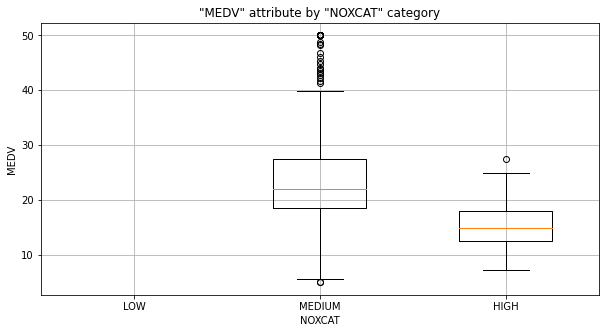

In [310]:
df_housing = df_housing.assign(NOXCAT = pd.cut(df_housing.NOX, bins=[0,.3,.7,1], right=False, labels=['LOW','MEDIUM','HIGH']))

plotlabels = ['LOW', 'MEDIUM', 'HIGH']
plotdata = [df_housing[df_housing['NOXCAT']==label]['MEDV'] for label in plotlabels]
plt.figure(figsize=(10, 5)) # Specify figure size
plt.boxplot(plotdata, labels=plotlabels, vert=True, widths=0.5, zorder=3) # Box plot
plt.xlabel('NOXCAT') # Set the label for the x axis
plt.ylabel('MEDV') # Set the label for the y axis
plt.title('"MEDV" attribute by "NOXCAT" category') # Set the figure title
plt.grid(zorder=0) # Add grid
plt.show()

### Exercise 2.3 (2 marks)
The newly created column `NOXCAT` in `df_housing` is a categorical column with three possible values (`LOW`, `MEDIUM`, and `HIGH`). 
- Create a set of dummy variables (for different values of `NOXCAT`).
- Regress `MEDV` on the different `NOX` categories using the dummy variables. Choose the dummy variable coding in your regression such that the intercept reflects the `MEDV` value of suburbs in the `MEDIUM` category. Save the regression result as `res_2` and `print` the regression result to the console.
- Report the regression results from `res_2` in your own words according to APA stype and interpret the coefficients.

Hint: Look at [`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [311]:
df_housing = pd.concat([df_housing, pd.get_dummies(df_housing['NOXCAT'],prefix='dummy')],axis=1)

mod = smf.ols('MEDV ~ dummy_HIGH + dummy_LOW', data=df_housing) # Define model
res_2 = mod.fit() # Fit using OLS
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.55e-13
Time:                        21:06:51   Log-Likelihood:                -1813.9
No. Observations:                 506   AIC:                             3632.
Df Residuals:                     504   BIC:                             3640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7092      0.420     56.516      0.0

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In our OLS model we are testing the relationship between MEDV and three dummy variables created that represent different values for NOXCAT; LOW, MED and HIGH. We have coded our dummy variable such that the Intercept is the MEDIUM dummy variable where both other dummy variables are 0.  

Observing an F-statistic of 55.26 we can determine the model fit is significant. For every 1 value increase in HIGH NOXCAT, there is a -8.2675 change in MEDV. There are no LOW NOXCAT values in our data set therefore we cannot report any relationship to MEDV for this category. Across both the Intercept and dummy_HIGH variable, we report a p value of <0.000 therefore supporting rejection of the null hypothesis. 

## Exercise 3 (4.5 marks): Classification

### Exercise 3.1 (2 marks)
- Create a new numerical column called `MEDVBIN` in `df_housing`. The column takes on the value `1` if `MEDV` is greater than the median of `MEDV`. Otherwise, it takes on the value `0`.
- Perform a logistic regression that regresses the newly created column `MEDVBIN` on `CRIM`, `RM`, `NOX`, `DIS` and `AGE` in order to predict the probability that a house has a high `MEDV`. Save the regression results as `res_3` and `print` the results to the console.
- Report the results of the logistic regression `res_3` in APA style, including reporting of AIC, and then interpret the coefficients in your own words. How are this regression and its results different from `res_1` done in Exercise 2.1?

Hint: Use [`statsmodels.formula.api.logit`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html) to perform the regression.

In [312]:
df_housing = df_housing.assign(MEDVBIN = np.where(df_housing['MEDV'] <= df_housing['MEDV'].median(), 0, 1))
mod = smf.logit('MEDVBIN ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) # Define model
res_3 = mod.fit() # Fit using MLE
print(res_3.summary())
print('AIC = ',res_3.aic)

Optimization terminated successfully.
         Current function value: 0.394887
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                MEDVBIN   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4302
Time:                        21:06:51   Log-Likelihood:                -199.81
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 4.174e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1635      2.442     -4.162      0.000     -14.950      -5.378
CRIM          -0.1627      0.

In our model we are testing to predict the MEDV based on selected predictor variables. We observe a significant relationship between the response variable and all coefficients, excluding NOX. For the coefficients with a significant relationship, we validate their significance by considering the z statistic for each, where we can see that all coefficients are sufficiently far enough away from the standard error excluding NOX to be classified as significant relationships. We report a p value of <0.000 across all variables excluding NOX, supporting rejection of the null hypothesis for these predictors.

Lastly, we have calculated an Akaike Information Criterion (AIC) for this model at a value of 411.6. AIC is designed to penalise models that utilise too many parameters and risk overfitting. Compared to our model AIC from Excercise 2.1 at 3238, the AIC for our Logit model is significantly lower, therefore presented as a more preferable model. 

### Exercise 3.2 (1 mark)
Continue from the results `res_3` from the previous exercise by considering the first example listed in `df_housing` (index 0).
- Based on the logistic regression model, how likely is it that this house has a `HIGH` `MEDV`? Use the model coefficient estimates and the corresponding values for the first example to calculate its logit and odds. `print` the logits and odds to the console.
- What `MEDVBIN` would be predicted for this first example by the model? Look at the actual `MEDVBIN` of this house and describe in your own words how well the model performed in this case.

Hint: You can access the coefficient estimates using the [`params`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.BinaryResults.html) attribute of your fitted model.

In [313]:
# model coefficient estimate log odds 
print(res_3.params)
# manually calculated odds 
samp1_odds = .79/(1-.79)
print(samp1_odds)
print("Odds calculated with probability:{}".format([samp1_odds]))

# probability prediction 
df_housing = df_housing.assign(MEDVBIN_PROB = res_3.predict())
# highval MEDV prediction
df_housing = df_housing.assign(MEDVBIN_PRED = df_housing['MEDVBIN_PROB'].apply(lambda x: np.where(x > 0.5, 1, 0)))

print("Model prediction probability for first sample:{:.2f}%".format(df_housing['MEDVBIN_PROB'][0]*100))
print("Model prediction for MEDVBIN:{}".format(df_housing['MEDVBIN_PRED'][0]))
print("True value for MEDVBIN:{}".format(df_housing['MEDVBIN'][0]))

Intercept   -10.163528
CRIM         -0.162719
RM            2.753815
NOX          -3.388740
DIS          -0.439377
AGE          -0.045712
dtype: float64
3.7619047619047628
Odds calculated with probability:[3.7619047619047628]
Model prediction probability for first sample:79.27%
Model prediction for MEDVBIN:1
True value for MEDVBIN:1


Based on our model it is very likely that this house is classified as HIGH MEDV, featuring an estimated probability of .792685. An interpretation can be made for the RM estimated coefficient, where for every unit increase in RM, the log odds of the sample being a HIGH MEDV property increases by 2.753815. The model has predicted the first sample to be classified as a HIGH MEDV property, which is accurate when compared to the training data calculation for MEDVBIN.  

### Exercise 3.3 (1.5 marks)
We would like to know not only how well the logistic regression model `res_3` did for the first example, but for our entire dataset.
- Use `res_3` to predict the probabilities of `MEDVBIN` being `1`, and save them as a new column `MEDVBIN_PROB` in `df_housing`.
- Generate the actual model predictions as a new column `MEDVBIN_PRED` in `df_housing` by setting them to `1` if the predicted probability `MEDVBIN_PROB` is greater than `0.5`, and to `0` otherwise. 
- Create a confusion matrix `conf_mat` for the results generated by `res_3` to tabulate the predictions `MEDVBIN_PRED` and actual values `MEDVBIN`. `print` `conf_mat` to the console.
- Based on `conf_mat`, calculate sensitivity, specificity, and accuracy. `print` these values to the console as a grammatically correct sentence.
- In you own words, interpret sensitivity, specificity, and accuracy.

Hint: Look at the [`predict`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.BinaryResults.html) method of your fitted model for generating the predictions. Also look at [`pd.crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [314]:
# probability prediction 
df_housing = df_housing.assign(MEDVBIN_PROB = res_3.predict())
# highval MEDV prediction
df_housing = df_housing.assign(MEDVBIN_PRED = df_housing['MEDVBIN_PROB'].apply(lambda x: np.where(x > 0.5, 1, 0)))

# confusion matrix
conf_mat = pd.crosstab(df_housing['MEDVBIN_PRED'], df_housing['MEDVBIN'], rownames=['Predicted'], colnames=['Actual'], margins=True)
print(conf_mat)

# calculating prediction accuracy 
sensitivity = conf_mat.loc[True, True]/conf_mat.loc['All', True]
specificity = conf_mat.loc[False, False]/conf_mat.loc['All', False]
accuracy = (conf_mat.loc[True, True]+conf_mat.loc[False, False])/conf_mat.loc['All','All']
print("For our model we have calculated the ratios of correct and incorrect predictions as Sensitivity={:.2f}%; Specificity={:.2f}% and Accuracy={:.2f}%.".format(sensitivity*100, specificity*100,accuracy*100))

Actual       0    1  All
Predicted               
0          218   45  263
1           38  205  243
All        256  250  506
For our model we have calculated the ratios of correct and incorrect predictions as Sensitivity=82.00%; Specificity=85.16% and Accuracy=83.60%.


Sensitivity, specificity and accuracy refer to the percentages of correct and incorrect predictions against the response variable true classification. In our model we observed a true positive prediction classifiction of 82% (sensitivity) and a true negative prediction classification of 85.16% (specificity). By dividing the total number of correctly predicted classifications by the total number of samples, we can report an overall model accuracy figure which in our case is 83.60% (accuracy). The slightly higher specificity compared to the sensitivity tells us that the model was able to more effectively use predictors to determine properties that were not classified as high value in our training data than those that were. 